# True vs Reco for interferometry

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pyrex
import pyrex.custom.ara as ara
from pyrex.internal_functions import normalize
import os
import sys
import seaborn as sns

sys.path.append("/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
# import math
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import itertools

# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
#mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

# import mplcyberpunk
# plt.style.use("cyberpunk")

current_palette = sns.color_palette('colorblind', 10)

/tmp/slurmtmp.17696949/ipykernel_2679/2328408789.py:25: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


In [2]:
appended_data = []
srcFolder = "/users/PCON0003/cond0068/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/Reco_sim/reco_code_cleanUp/data/"
for filename in os.listdir(srcFolder):#Loop over desired directory
        if (filename.startswith("polReco_run")): #extension, .root in this case
            name = os.path.join(srcFolder, str(filename))
            data = pd.read_pickle(name)
            appended_data.append(data)
pol = pd.concat(appended_data) 

N = len(pol)
omega_reco = []
omega_true = []
psi_reco = []
psi_true = []
weights = []
energy = []
SNR_V = []
SNR_H = []

for i,entry in zip(range(0,len(pol)), pol.itertuples()):
#     print(entry.PolReco[0])
    a = entry.PolReco
    a = np.array(a)
    if(np.isnan(a.mean())):
        continue
    omRec = []
    omTru = []
    psRec = []
    psTru = []
    
    for j in range(4,5):
        omRec.append(np.degrees(np.arccos(abs(entry.PolReco[j][2]))))
        psRec.append(np.degrees(np.arctan2(abs(entry.PolReco[j][1]), abs(entry.PolReco[j][0]))))
        omTru.append(np.degrees(np.arccos(abs(entry.PolTrue[j][2]))))
        psTru.append(np.degrees(np.arctan2(abs(entry.PolTrue[j][1]), abs(entry.PolTrue[j][0]))))

#     if(np.isnan(np.sum(omRec)) or np.isnan(np.sum(psRec)) or np.isnan(np.sum(psTru)) or np.isnan(np.sum(omTru))):
#         continue
        
    omega_reco.append(np.nanmean(omRec))
    psi_reco.append(np.nanmean(psRec))
    omega_true.append(np.nanmean(omTru))
    psi_true.append(np.nanmean(psTru))
    weights.append(entry.weight)
    energy.append(entry.energy)
    SNR_V.append(entry.SNR_V)
    SNR_H.append(entry.SNR_H)
    
omega_reco = np.array(omega_reco)
omega_true = np.array(omega_true)
psi_reco = np.array(psi_reco)
psi_true = np.array(psi_true)
weights = np.array(weights)
energy = np.array(energy)
SNR_V = np.array(SNR_V)
SNR_H = np.array(SNR_H)


deltaOmega = omega_reco-omega_true
deltaPsi = psi_reco-psi_true

pol_new = pd.DataFrame({"deltaOmega":deltaOmega, "deltaPsi":deltaPsi, "weights":weights, "energy":energy, "SNR_V":SNR_V, "SNR_H":SNR_H})


In [3]:
len(pol_new)

38025

In [4]:
# pol_new = pol_new.loc[pol_new.energy>1E18]

In [16]:
sns.distplot()

LookupError: unknown error handler name 'surrogatescape'

LookupError: unknown error handler name 'surrogatescape'

<Figure size 360x360 with 1 Axes>

In [ ]:
sns.distplot(pol_new.deltaPsi, bins = 200, hist_kws={'weights': pol_new.weights}, kde=False, label = "$\mu = %0.3f $\n$\sigma = %0.3f$"%(deltaPsi.mean(), deltaPsi.std()))

# plt.hist(np.array(psi_reco)-np.array(psi_true), bins = 100)
plt.xlabel('$\Delta \Psi$ [deg.]')
plt.legend()

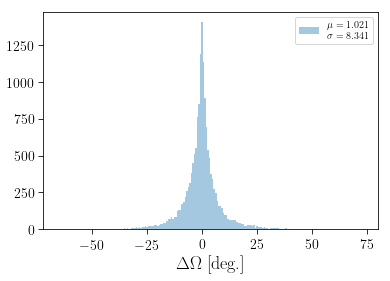

In [6]:
sns.distplot(pol_new.deltaOmega, bins = 200, hist_kws={'weights': pol_new.weights}, kde=False, label = "$\mu = %0.3f $\n$\sigma = %0.3f$"%(deltaOmega.mean(), deltaOmega.std()))
# plt.hist(np.array(omega_reco)-np.array(omega_true), bins = 100, weights=weights)

plt.xlabel('$\Delta \Omega$ [deg.]')
plt.legend()
# plt.yscale('log')
# plt.ylim(1,1E3)


Text(0,0.5,'$/Omega_{true}$')

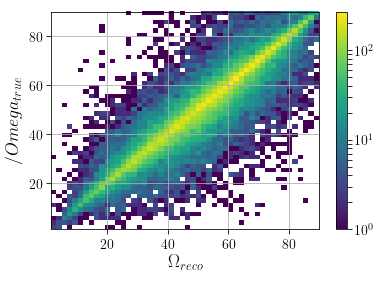

In [7]:
plt.hist2d(np.array(omega_reco),np.array(omega_true), bins = 50, norm=mpl.colors.LogNorm());
plt.colorbar()
plt.grid()
plt.xlabel("$\Omega_{reco}$")
plt.ylabel("$/Omega_{true}$")

## Stuff as a function of SNR

In [8]:
from scipy.optimize import curve_fit

# scipy.stats.norm.fit(delta)
def gauss(x,A, mu, sig):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
bins=200


In [9]:
mean = [[],[],[]]
mean_err = [[],[]]
resolution = [[],[],[]]
resolution_err = [[],[],[]]
meanH = [[],[],[]]
meanH_err = [[],[]]
resolutionH = [[],[],[]]
resolutionH_err = [[],[],[]]
numev_V = []
numev_H = []

for SNR in np.arange(5,30,1):
    SNR_recoNu = pol_new.loc[abs(pol_new.SNR_V-SNR)<=3]

    delta = SNR_recoNu.deltaOmega
    deltaPhi = SNR_recoNu.deltaPsi 
    delta_mean = np.median(delta)
    variance = np.dot(SNR_recoNu.weights, (delta - delta_mean) ** 2) / SNR_recoNu.weights.sum()
    delta_std = np.sqrt(variance)
    
    data_entries_Om, bins_Om = np.histogram(delta, bins=bins, weights=SNR_recoNu.weights, density=True)
    binscenters_Om = np.array([0.5 * (bins_Om[i] + bins_Om[i+1]) for i in range(len(bins_Om)-1)])
    poptOm, pcov = curve_fit(gauss, xdata=binscenters_Om, ydata=data_entries_Om)
    perr_Om = np.sqrt(np.diag(pcov))   
    mean_err[0].append(perr_Om[1])
    resolution_err[0].append(perr_Om[2])
    

    data_entries_Psi, bins_Psi = np.histogram(deltaPhi, bins=bins, weights=SNR_recoNu.weights, density=True)
    binscenters_Psi = np.array([0.5 * (bins_Psi[i] + bins_Psi[i+1]) for i in range(len(bins_Psi)-1)])
    poptPsi, pcov = curve_fit(gauss, xdata=binscenters_Psi, ydata=data_entries_Psi)
    perr_Psi = np.sqrt(np.diag(pcov))    
    mean_err[1].append(perr_Psi[1])
    resolution_err[1].append(perr_Psi[2])
    
    deltaPhi_mean = np.median(deltaPhi)
    variancePhi = np.dot(SNR_recoNu.weights, (deltaPhi - deltaPhi_mean) ** 2) / SNR_recoNu.weights.sum()
    deltaPhi_std = np.sqrt(variancePhi)
    
    resolution[0].append(SNR)
    resolution[1].append(delta.std())
    resolution[2].append(deltaPhi.std())
    
    mean[0].append(SNR)
    mean[1].append(delta_mean)
    mean[2].append(deltaPhi_mean)
    numev_V.append(len(SNR_recoNu))
#     plt.figure()
#     sns.distplot(SNR_recoNu.deltaOmega, bins = 200, hist_kws={'weights': SNR_recoNu.weights}, kde=True, label = "$\mu = %0.3f $\n$\sigma = %0.3f$"%(deltaOmega.mean(), deltaOmega.std()))
#     plt.hist(delta, bins=bins, weights=SNR_recoNu.weights, density=True)
#     plt.plot(binscenters_Om, gauss(binscenters_Om, *poptOm))

    
for SNR in np.arange(5,30,1):
    SNR_recoNu = pol_new.loc[abs(pol_new.SNR_H-SNR)<=3]

    delta = SNR_recoNu.deltaOmega
    deltaPhi = SNR_recoNu.deltaPsi
    
    delta_mean = np.median(delta)
    variance = np.dot(SNR_recoNu.weights, (delta - delta_mean) ** 2) / SNR_recoNu.weights.sum()
    delta_std = np.sqrt(variance)
    
    deltaPhi_mean = np.median(deltaPhi)
    variancePhi = np.dot(SNR_recoNu.weights, (deltaPhi - deltaPhi_mean) ** 2) / SNR_recoNu.weights.sum()
    deltaPhi_std = np.sqrt(variancePhi)
    
    data_entries_Om, bins_Om = np.histogram(delta, bins=bins, weights=SNR_recoNu.weights, density=True)
    binscenters_Om = np.array([0.5 * (bins_Om[i] + bins_Om[i+1]) for i in range(len(bins_Om)-1)])
    poptOm, pcov = curve_fit(gauss, xdata=binscenters_Om, ydata=data_entries_Om)
    perr_Om = np.sqrt(np.diag(pcov))   
    meanH_err[0].append(perr_Om[1])
    resolutionH_err[0].append(perr_Om[2])
    
    data_entries_Psi, bins_Psi = np.histogram(deltaPhi, bins=bins, weights=SNR_recoNu.weights, density=True)
    binscenters_Psi = np.array([0.5 * (bins_Psi[i] + bins_Psi[i+1]) for i in range(len(bins_Psi)-1)])
    poptPsi, pcov = curve_fit(gauss, xdata=binscenters_Psi, ydata=data_entries_Psi)
    perr_Psi = np.sqrt(np.diag(pcov))    
    meanH_err[1].append(perr_Psi[1])
    resolutionH_err[1].append(perr_Psi[2])
    
    resolutionH[0].append(SNR)
    resolutionH[1].append(delta.std())
    resolutionH[2].append(deltaPhi.std())
    
    meanH[0].append(SNR)
    meanH[1].append(delta_mean)
    meanH[2].append(deltaPhi_mean)
    numev_H.append(len(SNR_recoNu))

    

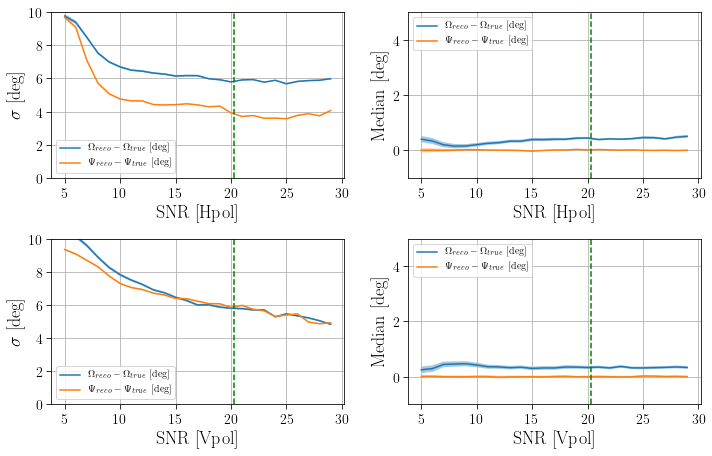

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
axes[0,0].plot(resolutionH[0],abs(np.array(resolutionH[1])), label="$\Omega_{reco}-\Omega_{true}$ [deg]")
axes[0,0].fill_between(resolutionH[0],resolutionH[1]+np.array(resolutionH_err[0]),resolutionH[1]-np.array(resolutionH_err[0]),alpha=0.4)
axes[0,0].plot(resolutionH[0],abs(np.array(resolutionH[2])), label="$\Psi_{reco}-\Psi_{true}$ [deg]")
axes[0,0].fill_between(resolutionH[0],abs(np.array(resolutionH[2]))+abs(np.array(resolutionH_err[1])),abs(np.array(resolutionH[2]))-abs(np.array(resolutionH_err[1])),alpha=0.4)
axes[0,0].set_xlabel("SNR [Hpol]")
axes[0,0].set_ylabel("$\sigma$ [deg]")
axes[0,0].axvline(20.3,ls="--",color="green")
axes[0,0].legend()
axes[0,0].grid()
axes[0,0].set_ylim(0,10)


axes[0,1].plot(meanH[0],meanH[1], label="$\Omega_{reco}-\Omega_{true}$ [deg]")
axes[0,1].fill_between(meanH[0],meanH[1]+np.array(meanH_err[0]),meanH[1]-np.array(meanH_err[0]),alpha=0.4)
axes[0,1].plot(meanH[0],meanH[2], label="$\Psi_{reco}-\Psi_{true}$ [deg]")
axes[0,1].fill_between(meanH[0],meanH[2]+np.array(meanH_err[1]),meanH[2]-np.array(meanH_err[1]),alpha=0.4)
axes[0,1].set_xlabel("SNR [Hpol]")
axes[0,1].set_ylabel("Median [deg]")
axes[0,1].axvline(20.3,ls="--",color="green")
axes[0,1].legend()
axes[0,1].grid()
axes[0,1].set_ylim(-1,5)


axes[1,0].plot(resolution[0],abs(np.array(resolution[1])), label="$\Omega_{reco}-\Omega_{true}$ [deg]")
axes[1,0].fill_between(resolution[0],abs(np.array(resolution[1]))+abs(np.array(resolution_err[0])),abs(np.array(resolution[1]))-abs(np.array(resolution_err[0])),alpha=0.4)
axes[1,0].plot(resolution[0],abs(np.array(resolution[2])), label="$\Psi_{reco}-\Psi_{true}$ [deg]")
# axes[1,0].fill_between(resolution[0],resolution[2]+np.array(resolution_err[1]),resolution[2]-np.array(resolution_err[1]),alpha=0.4)
axes[1,0].fill_between(resolution[0],abs(np.array(resolution[2]))+abs(np.array(resolution_err[1])),abs(np.array(resolution[2]))-abs(np.array(resolution_err[1])),alpha=0.4)

axes[1,0].set_xlabel("SNR [Vpol]")
axes[1,0].set_ylabel("$\sigma$ [deg]")
axes[1,0].axvline(20.3,ls="--",color="green")
axes[1,0].legend()
axes[1,0].grid()
axes[1,0].set_ylim(0,10)


axes[1,1].plot(mean[0],mean[1], label="$\Omega_{reco}-\Omega_{true}$ [deg]")
axes[1,1].fill_between(mean[0],mean[1]+np.array(mean_err[0]),mean[1]-np.array(mean_err[0]),alpha=0.4)
axes[1,1].plot(mean[0],mean[2], label="$\Psi_{reco}-\Psi_{true}$ [deg]")
axes[1,1].fill_between(mean[0],mean[2]+np.array(mean_err[1]),mean[2]-np.array(mean_err[1]),alpha=0.4)
axes[1,1].set_xlabel("SNR [Vpol]")
axes[1,1].set_ylabel("Median [deg]")
axes[1,1].axvline(20.3,ls="--",color="green")
axes[1,1].legend()
axes[1,1].grid()
axes[1,1].set_ylim(-1,5)
# plt.suptitle("SNR$_H>%i$, SNR$_V>%i$"%(SNR_cutH,SNR_cutV), fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig(my_path_plots+'/PolReco_finalPlots/SNR_scan_ratioPowerWindowed_RecoSign_ARIANNA_SNR_limitedAng.png', dpi=250)

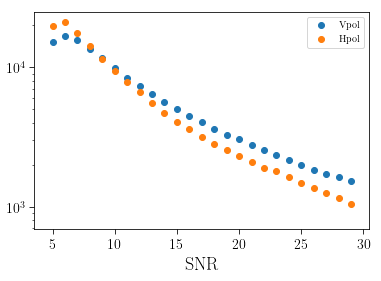

In [11]:
plt.scatter(resolution[0],numev_V, label = "Vpol")
plt.scatter(resolutionH[0],numev_H, label = "Hpol")

plt.yscale('log')
# plt.ylim(50, 2E3)
plt.xlabel("SNR")
plt.legend()

In [12]:
def find68PercentLimits(array, binNum, weights):
    upperLim = 0
    lowerLim = 0
    data_entries_Om, bins_Om = np.histogram(array, bins=binNum, weights=weights, density=True)
    bin_width = bins_Om[1] - bins_Om[0]
    binMedian = findMedianBin(array, binNum, weights)
#     print('binMedian is %i'%binMedian )
    for bins in range(binNum):
        integral = bin_width * sum(data_entries_Om[binMedian:bins])
        if (integral>0.34):
            break
        upperLim = bins
    for bins in range(binNum):
        integral = bin_width * sum(data_entries_Om[bins:binMedian])
        if (integral<0.34):
            break
        lowerLim = bins
    return bins_Om[binMedian], bins_Om[lowerLim], bins_Om[upperLim]

def findMedianBin(array, binNum, weights):
    data_entries_Om, bins_Om = np.histogram(array, bins=binNum, weights=weights, density=True)
    bin_width = bins_Om[1] - bins_Om[0]
    median = np.median(array)
    findBin = np.where(abs(bins_Om - median)<bin_width)
    return findBin[0][0]

## Same plot but with with 68% limits

In [42]:
SNR_arr = []

meanV = [[],[]]
upperV = [[],[]]
lowerV = [[],[]]

meanH = [[],[]]
upperH = [[],[]]
lowerH = [[],[]]

#Vpol

for SNR in np.arange(5,30,1):
#     SNR_recoNu = pol_new.loc[abs(pol_new.SNR_V-SNR)<=3]
    SNR_recoNu = pol_new.loc[pol_new.SNR_V>SNR]
    SNR_arr.append(SNR)

    #Omega
    mean, lower, upper = find68PercentLimits(SNR_recoNu.deltaOmega, 300, SNR_recoNu.weights)
    meanV[0].append(mean)
    upperV[0].append(upper)
    lowerV[0].append(upper)
    
    #Psi
    mean, lower, upper = find68PercentLimits(SNR_recoNu.deltaPsi, 300, SNR_recoNu.weights)
    meanV[1].append(mean)
    upperV[1].append(upper)
    lowerV[1].append(upper)
    
#Hpol
for SNR in np.arange(5,30,1):
#     SNR_recoNu = pol_new.loc[abs(pol_new.SNR_H-SNR)<=3]
    SNR_recoNu = pol_new.loc[pol_new.SNR_H>SNR]

    #Omega
    mean, lower, upper = find68PercentLimits(SNR_recoNu.deltaOmega, 300, SNR_recoNu.weights)
    meanH[0].append(mean)
    upperH[0].append(upper)
    lowerH[0].append(upper)
    
    #Psi
    mean, lower, upper = find68PercentLimits(SNR_recoNu.deltaPsi, 300, SNR_recoNu.weights)
    meanH[1].append(mean)
    upperH[1].append(upper)
    lowerH[1].append(upper)

SNR_arr = np.array(SNR_arr)

meanV = np.array(meanV)
upperV = np.array(upperV)
lowerV = np.array(lowerV)

meanH = np.array(meanH)
upperH = np.array(upperH)
lowerH = np.array(lowerH)

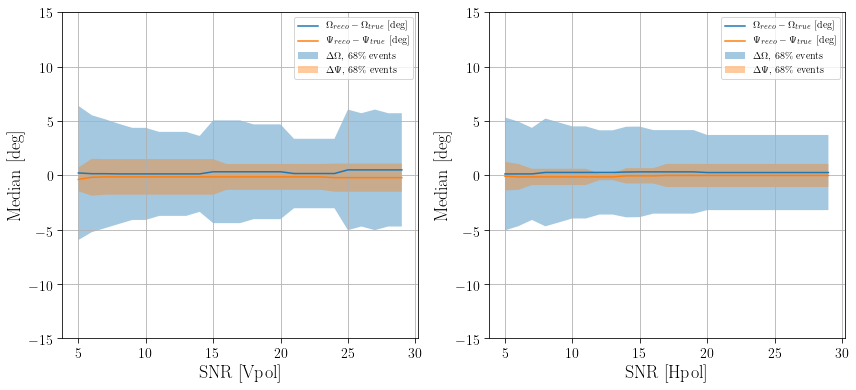

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].plot(SNR_arr,meanV[0], label="$\Omega_{reco}-\Omega_{true}$ [deg]")
axes[0].fill_between(SNR_arr, meanV[0]-lowerV[0], meanV[0]+upperV[0] ,alpha=0.4, label = "$\Delta\Omega,\, 68\%$ events")

axes[0].plot(SNR_arr,meanV[1], label="$\Psi_{reco}-\Psi_{true}$ [deg]")
axes[0].fill_between(SNR_arr, meanV[1]-lowerV[1], meanV[1]+upperV[1] ,alpha=0.4, label = "$\Delta\Psi,\, 68\%$ events")

# axes[0,0].plot(resolutionH[0],abs(np.array(resolutionH[2])), label="$\Psi_{reco}-\Psi_{true}$ [deg]")
# axes[0,0].fill_between(resolutionH[0],abs(np.array(resolutionH[2]))+abs(np.array(resolutionH_err[1])),abs(np.array(resolutionH[2]))-abs(np.array(resolutionH_err[1])),alpha=0.4)
axes[0].set_xlabel("SNR [Vpol]")
axes[0].set_ylabel("Median [deg]")
# axes[0].axvline(20.3,ls="--",color="green")
axes[0].legend(loc='upper right')
axes[0].grid()
axes[0].set_ylim(-15,15)


axes[1].plot(SNR_arr,meanH[0], label="$\Omega_{reco}-\Omega_{true}$ [deg]")
axes[1].fill_between(SNR_arr, meanH[0]-lowerH[0], meanH[0]+upperH[0] ,alpha=0.4, label = "$\Delta\Omega,\, 68\%$ events")

axes[1].plot(SNR_arr,meanH[1], label="$\Psi_{reco}-\Psi_{true}$ [deg]")
axes[1].fill_between(SNR_arr, meanH[1]-lowerH[1], meanH[1]+upperH[1] ,alpha=0.4, label = "$\Delta\Psi,\, 68\%$ events")

# axes[0].plot(resolutionH[0],abs(np.array(resolutionH[2])), label="$\Psi_{reco}-\Psi_{true}$ [deg]")
# axes[0].fill_between(resolutionH[0],abs(np.array(resolutionH[2]))+abs(np.array(resolutionH_err[1])),abs(np.array(resolutionH[2]))-abs(np.array(resolutionH_err[1])),alpha=0.4)
axes[1].set_xlabel("SNR [Hpol]")
axes[1].set_ylabel("Median [deg]")
# axes[1].axvline(20.3,ls="--",color="green")
axes[1].legend(loc='upper right')
axes[1].grid()
axes[1].set_ylim(-15,15)

# plt.suptitle("$\Omega = \\tan^{-1}({A_H/A_V})$, SNR$_H>%i$ + SNR$_V>%i$ + saturation cut"%(SNR_cutH,SNR_cutV), fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('./Plots/SNRVsResolution_Median_68Pct.pdf')



## Energy plots

In [36]:
SNR_arr = []

meanV = [[],[]]
upperV = [[],[]]
lowerV = [[],[]]

meanH = [[],[]]
upperH = [[],[]]
lowerH = [[],[]]

#Vpol

for energy in np.arange(17,21.5,0.5):
    SNR_recoNu = pol_new.loc[abs(np.log10(pol_new.energy)-np.log10(np.power(10,energy)))<0.5]
    SNR_arr.append(energy)

    #Omega
    mean, lower, upper = find68PercentLimits(SNR_recoNu.deltaOmega, 500, SNR_recoNu.weights)
    meanV[0].append(mean)
    upperV[0].append(upper)
    lowerV[0].append(upper)
    
    #Psi
    mean, lower, upper = find68PercentLimits(SNR_recoNu.deltaPsi, 500, SNR_recoNu.weights)
    meanV[1].append(mean)
    upperV[1].append(upper)
    lowerV[1].append(upper)
    
#Hpol
for energy in np.arange(17,21,0.5):
    SNR_recoNu = pol_new.loc[abs(np.log10(pol_new.energy)-np.log10(np.power(10,energy)))<0.5]
    
    #Omega
    mean, lower, upper = find68PercentLimits(SNR_recoNu.deltaOmega, 500, SNR_recoNu.weights)
    meanH[0].append(mean)
    upperH[0].append(upper)
    lowerH[0].append(upper)
    
    #Psi
    mean, lower, upper = find68PercentLimits(SNR_recoNu.deltaPsi, 500, SNR_recoNu.weights)
    meanH[1].append(mean)
    upperH[1].append(upper)
    lowerH[1].append(upper)

SNR_arr = np.array(SNR_arr)

meanV = np.array(meanV)
upperV = np.array(upperV)
lowerV = np.array(lowerV)

meanH = np.array(meanH)
upperH = np.array(upperH)
lowerH = np.array(lowerH)

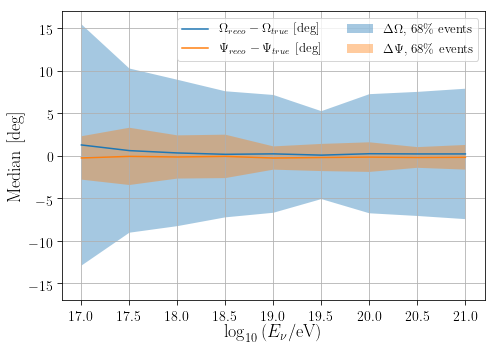

In [38]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.figure(figsize=(7,5))

plt.plot(SNR_arr,meanV[0], label="$\Omega_{reco}-\Omega_{true}$ [deg]")
plt.fill_between(SNR_arr, meanV[0]-lowerV[0], meanV[0]+upperV[0] ,alpha=0.4, label = "$\Delta\Omega,\, 68\%$ events")

plt.plot(SNR_arr,meanV[1], label="$\Psi_{reco}-\Psi_{true}$ [deg]")
plt.fill_between(SNR_arr, meanV[1]-lowerV[1], meanV[1]+upperV[1] ,alpha=0.4, label = "$\Delta\Psi,\, 68\%$ events")
plt.ylim(-17,17)
plt.xlabel("$\log_{10}{(E_{\\nu}}$/eV)")
plt.ylabel("Median [deg]")
plt.legend(fontsize=13, ncol=2)
plt.grid()

# plt.title("SNR$_H>%i$ + SNR$_V>%i$ + saturation cut"%(SNR_cutH,SNR_cutV))
plt.tight_layout()
plt.savefig('./Plots/EnergyVsResolution_Median_SNR.pdf')